# Binary Classification Project - HR Data Analysis


 - Using input data from Kaggle DataSet:  https://www.kaggle.com/giripujar/hr-analytics

 - Data includes several data fields about employees, and a 0/1 indicator if they left the company.
 

STEPS PERFORMED IN THE ANALYSIS:
 
 1.) Read in Data and initial review of fields and data.
 
 2.) Use Pivot Tables to analyze key turnover variable, "left" against other variables in the data.

 3.) Create different DataFrames for employees who stayed and who left for analysis.
 
 4.) Create Histograms of values to visualize the differences in staying/leaving in key variables.
 
 5.) Convert salary text field with "Low"/"Medium"/"High" values to numeric for model analysis.
 
 6.) Convert Catagorical/Text Field 'Department' into seperate fields using Get_Dummies Command.
 
 7.) Seperate the data variables from the prediction variable.
 
 8.) Run train_test_split command to prepare data for training and testing.
 
 9.) Run Logistic Regression, SVC, and Random Forest models for prediction.
 
 10.) Evaluate Results - Random Forest is best Model for this data with score of 99.


In [18]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [19]:
# Create HR file DataFrame, Look at Header Info:
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Look at Features, Types, and N/A Values if any:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Create Pivot Tables to Summarize Turnover ("left") Data by Variable:

### Catagorical Variables:

In [12]:
# Time Spent With Company:
print(pd.pivot_table(df_hr, index = 'left', columns = 'time_spend_company', values = 'Department' ,aggfunc ='count'))

time_spend_company      2       3       4      5      6      7      8      10
left                                                                         
0                   3191.0  4857.0  1667.0  640.0  509.0  188.0  162.0  214.0
1                     53.0  1586.0   890.0  833.0  209.0    NaN    NaN    NaN


In [11]:
# Turnover by Department:
print(pd.pivot_table(df_hr, index = 'left', columns = 'Department', values = 'salary' ,aggfunc ='count'))

Department   IT  RandD  accounting   hr  management  marketing  product_mng  \
left                                                                          
0           954    666         563  524         539        655          704   
1           273    121         204  215          91        203          198   

Department  sales  support  technical  
left                                   
0            3126     1674       2023  
1            1014      555        697  


In [10]:
# Turnover by Salary Level:
print(pd.pivot_table(df_hr, index = 'left', columns = 'salary', values = 'Department' ,aggfunc ='count'))

salary  high   low  medium
left                      
0       1155  5144    5129
1         82  2172    1317


In [17]:
# Turnover by whether or not someone had an accident:
print(pd.pivot_table(df_hr, index = 'left', columns = 'Work_accident', values = 'Department' ,aggfunc ='count'))

Work_accident     0     1
left                     
0              9428  2000
1              3402   169


In [18]:
# Turnover by Promotion in the last 5 years:
print(pd.pivot_table(df_hr, index = 'left', columns = 'promotion_last_5years', values = 'Department' ,aggfunc ='count'))

promotion_last_5years      0    1
left                             
0                      11128  300
1                       3552   19


### Continious Variables:

In [16]:
print(pd.pivot_table(df_hr, index = 'left', values = ['number_project','average_montly_hours','last_evaluation','satisfaction_level']))

      average_montly_hours  last_evaluation  number_project  \
left                                                          
0               199.060203         0.715473        3.786664   
1               207.419210         0.718113        3.855503   

      satisfaction_level  
left                      
0               0.666810  
1               0.440098  


In [20]:
#Create seperate DataFrames for employees who "left" and those who "stayed"
df_left = df_hr[df_hr.left == 1]
df_stay = df_hr[df_hr.left == 0]

In [4]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3571 non-null   float64
 1   last_evaluation        3571 non-null   float64
 2   number_project         3571 non-null   int64  
 3   average_montly_hours   3571 non-null   int64  
 4   time_spend_company     3571 non-null   int64  
 5   Work_accident          3571 non-null   int64  
 6   left                   3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   Department             3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 306.9+ KB


In [5]:
df_stay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 2000 to 14210
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11428 non-null  float64
 1   last_evaluation        11428 non-null  float64
 2   number_project         11428 non-null  int64  
 3   average_montly_hours   11428 non-null  int64  
 4   time_spend_company     11428 non-null  int64  
 5   Work_accident          11428 non-null  int64  
 6   left                   11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   Department             11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 982.1+ KB


# Create Histograms to See Value Ranges of Key Fields

(array([ 914.,   20.,   41., 1000.,  575.,   39.,   38.,  176.,  375.,
         393.]),
 array([0.09 , 0.173, 0.256, 0.339, 0.422, 0.505, 0.588, 0.671, 0.754,
        0.837, 0.92 ]),
 <BarContainer object of 10 artists>)

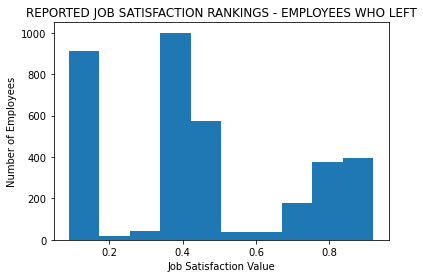

In [21]:
plt.xlabel('Job Satisfaction Value')
plt.ylabel('Number of Employees')
plt.title('REPORTED JOB SATISFACTION RANKINGS - EMPLOYEES WHO LEFT')
plt.hist(df_left.satisfaction_level)

(array([ 554.,  403.,  357.,  376., 1475., 1742., 1727., 1693., 1561.,
        1540.]),
 array([0.12 , 0.208, 0.296, 0.384, 0.472, 0.56 , 0.648, 0.736, 0.824,
        0.912, 1.   ]),
 <BarContainer object of 10 artists>)

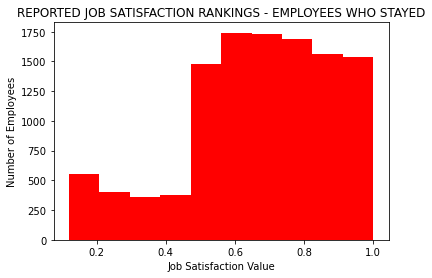

In [22]:
plt.xlabel('Job Satisfaction Value')
plt.ylabel('Number of Employees')
plt.title('REPORTED JOB SATISFACTION RANKINGS - EMPLOYEES WHO STAYED')
plt.hist(df_stay.satisfaction_level,color='red')

# Convert Text Salary Field to Numeric:  Field is Ordinal, so will convert salary "levels" to numeric values.

In [23]:
# Add a Numeric Field for Salary
df_hr['salary_num'] = 0

In [24]:
df_hr.loc[df_hr['salary'] == 'low', 'salary_num'] = 1
df_hr.loc[df_hr['salary'] == 'medium', 'salary_num'] = 2
df_hr.loc[df_hr['salary'] == 'high', 'salary_num'] = 3

In [25]:
df_hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [63]:
# Confirm Turnover by Salary Number is the same as by Salary Level:
print(pd.pivot_table(df_hr, index = 'left', columns = 'salary_num', values = 'Department' ,aggfunc ='count'))

salary_num     1     2     3
left                        
0           5144  5129  1155
1           2172  1317    82


In [64]:
# Turnover by Salary Level:
print(pd.pivot_table(df_hr, index = 'left', columns = 'salary', values = 'Department' ,aggfunc ='count'))

salary  high   low  medium
left                      
0       1155  5144    5129
1         82  2172    1317


In [26]:
#  Remove Salary Text Field
df_hr = df_hr.drop('salary', axis=1)
df_hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
5,0.41,0.50,2,153,3,0,1,0,sales,1
6,0.10,0.77,6,247,4,0,1,0,sales,1
7,0.92,0.85,5,259,5,0,1,0,sales,1
8,0.89,1.00,5,224,5,0,1,0,sales,1
9,0.42,0.53,2,142,3,0,1,0,sales,1


# Convert Catagorical/Text Field 'Department' into seperate fields using Get_Dummies Command

In [27]:
df_dum = pd.get_dummies(df_hr.Department)

In [28]:
df_dum

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [29]:
df_merged = pd.concat([df_hr,df_dum],axis='columns')

In [30]:
df_merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_num,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0


In [31]:
#Drop original 'Department' text field and one of new Dummies column fields as redundant - 'technical'
df_final = df_merged.drop(['Department','technical'],axis='columns')
df_final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1


# Create Seperate DataFrames for Dependant and Independant Variables

In [32]:
df_features = df_final.drop('left', axis=1)

In [33]:
df_features.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
df_dependant = df_final.left

In [41]:
df_dependant.head(6000)

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: left, Length: 6000, dtype: int64

# Create Training and Testing Datasets - Run and Score ML Models: Logistic, SVC, and Random Forest

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_dependant,test_size=0.25)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

In [46]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
y_test

8737     0
539      1
4999     0
5341     0
5143     0
        ..
1571     1
1099     1
2890     0
13095    0
12044    1
Name: left, Length: 3750, dtype: int64

In [48]:
model.score(X_test, y_test)

0.7952

In [50]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9562666666666667

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9906666666666667

# Conclusion: Random Forest is the Best Model with a 99% Score. 